In [4]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import acquire
import prepare

In [52]:
df = acquire.get_titanic_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [58]:
train,validate,test = prepare.prep_titanic(df)
train

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
458,1,2,0,0,10.5000,1,0,0,1
271,1,3,0,0,0.0000,1,1,0,1
528,0,3,0,0,7.9250,1,1,0,1
580,1,2,1,1,30.0000,0,0,0,1
124,0,1,0,1,77.2875,0,1,0,1
...,...,...,...,...,...,...,...,...,...
611,0,3,0,0,7.0500,1,1,0,1
430,1,1,0,0,26.5500,1,1,0,1
598,0,3,0,0,7.2250,1,1,0,0
517,0,3,0,0,24.1500,1,1,1,0


### exercise 1:
What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [4]:
train.survived.mode()


baseline_accuracy = (0 == train.survived).mean()
baseline_accuracy.round(3)

0.616

### exercise 2:

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [59]:
x_train = train.drop(columns=['survived'])
y_train = train['survived']

x_validate = validate.drop(columns=['survived'])
y_validate = validate['survived']

x_test = test.drop(columns=['survived'])
y_test = test['survived']

In [6]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
y_pred[0:5]


array([1, 0, 0, 1, 0])

### exercise 3:
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [7]:
clf.score(x_train, y_train)

0.8089887640449438

In [8]:
confusion_matrix(y_pred,y_train)

array([[294,  67],
       [ 35, 138]])

In [9]:
print(classification_report(y_train, y_pred))

train.survived.value_counts()

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       329
           1       0.80      0.67      0.73       205

    accuracy                           0.81       534
   macro avg       0.81      0.78      0.79       534
weighted avg       0.81      0.81      0.81       534



0    329
1    205
Name: survived, dtype: int64

### exercise 4:
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [10]:
labels = sorted(y_train.unique())
results = sorted(['p_died','p_survived'])
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=results).T

,0,1
p_died,294,67
p_survived,35,138


### exercise 5:
Run through steps 2-4 using a different max_depth value.

In [11]:
clf2 = DecisionTreeClassifier(max_depth=6, random_state=123)
clf2 = clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_train)
y_pred2[0:5]
print(classification_report(y_train, y_pred2))

train.survived.value_counts()

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       329
           1       0.87      0.75      0.81       205

    accuracy                           0.86       534
   macro avg       0.86      0.84      0.85       534
weighted avg       0.86      0.86      0.86       534



0    329
1    205
Name: survived, dtype: int64

### exercise 6:
Which model performs better on your in-sample data? **clf2 performs better in sample**

### exercise 7:
Which model performs best on your out-of-sample data, the validate set?

In [14]:
y_pred = clf.predict(x_validate)
y_pred2 = clf2.predict(x_validate)

print(classification_report(y_validate, y_pred))
print(classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       110
           1       0.86      0.63      0.73        68

    accuracy                           0.82       178
   macro avg       0.83      0.78      0.80       178
weighted avg       0.83      0.82      0.81       178

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       110
           1       0.76      0.62      0.68        68

    accuracy                           0.78       178
   macro avg       0.78      0.75      0.76       178
weighted avg       0.78      0.78      0.78       178



### exercise 8:
Work through these same exercises using the Telco dataset.

In [46]:
telco = acquire.get_telco_data()
telco = telco[telco.total_charges != ' ']
train,validate,test = prepare.prep_telco(telco)

In [47]:
train

,senior_citizen,tenure,monthly_charges,total_charges,churn,paperless_billing_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,phone_service_Yes,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3727,0,45,20.35,929.2,No,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
4271,0,34,20.65,716.4,No,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,1
6317,0,15,19.45,340.85,No,1,1,0,1,0,...,1,1,0,0,0,0,1,1,0,0
489,0,12,61.65,713.75,Yes,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
3771,0,7,62.80,418.3,No,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,0,49,35.80,1782,No,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
275,1,54,101.50,5373.1,Yes,1,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
3465,0,1,94.60,94.6,Yes,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3444,0,22,25.25,555.4,No,0,1,0,1,0,...,1,1,0,0,1,0,1,1,0,0


In [33]:
train = train[train.total_charges != ' ']



In [49]:
x_train = train.drop(columns=['churn'])
y_train = train['churn']

x_validate = validate.drop(columns=['churn'])
y_validate = validate['churn']

x_test = test.drop(columns=['churn'])
y_test = test['churn']

In [50]:
clf = DecisionTreeClassifier(max_depth=5,random_state=123)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
print(classification_report(y_train,y_pred))
y_pred = clf.predict(x_validate)
print(classification_report(y_validate,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87      3097
         Yes       0.63      0.62      0.63      1121

    accuracy                           0.80      4218
   macro avg       0.75      0.75      0.75      4218
weighted avg       0.80      0.80      0.80      4218

              precision    recall  f1-score   support

          No       0.85      0.84      0.85      1033
         Yes       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



## Random Forest
### exercise 1:
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [76]:
rf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf1 = rf1.fit(x_train,y_train)
y_pred = rf1.predict(x_train)

### exercise 2:

Evaluate your results using the model score, confusion matrix, and classification report.

In [77]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf1.score(x_train, y_train)))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

Accuracy of random forest classifier on test set: 0.93
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       329
           1       0.93      0.88      0.90       205

    accuracy                           0.93       534
   macro avg       0.93      0.92      0.92       534
weighted avg       0.93      0.93      0.93       534

[[316  13]
 [ 25 180]]


### exercise 3:
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [74]:
def test_stats(train, pred):
    TN, FP, FN, TP = confusion_matrix(train, pred).ravel()

    ALL = TP + FP + FN + TN

    accuracy = (TP + TN)/ALL
    true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
    false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
    true_negative_rate = specificity = selectivity = TN/(TN+FP)
    false_negative_rate = miss_rate = FN/(FN+TP)
    precision = PPV = TP/(TP+FP)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}", '\n')
    print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
    print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
    print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
    print(f"Precision/PPV: {precision}", '\n')
    print(f"F1 Score: {f1_score}", '\n')
    print(f"Support (0): {support_neg}", '\n')
    print(f"Support (1): {support_pos}")


In [78]:
test_stats(y_train,y_pred)

Accuracy: 0.9288389513108615 

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049 

False Positive Rate/False Alarm Ratio/Fall-out: 0.03951367781155015 

True Negative Rate/Specificity/Selectivity: 0.9604863221884499 

False Negative Rate/Miss Rate: 0.12195121951219512 

Precision/PPV: 0.9326424870466321 

F1 Score: 0.9045226130653267 

Support (0): 329 

Support (1): 205


### exercise 4:
Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [79]:
rf2 = RandomForestClassifier(min_samples_leaf=5, max_depth=5, random_state=123)
rf2 = rf2.fit(x_train,y_train)
y_pred = rf2.predict(x_train)

In [80]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf2.score(x_train, y_train)))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

Accuracy of random forest classifier on test set: 0.85
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       329
           1       0.88      0.70      0.78       205

    accuracy                           0.85       534
   macro avg       0.86      0.82      0.83       534
weighted avg       0.85      0.85      0.84       534

[[310  19]
 [ 62 143]]


In [81]:
test_stats(y_train,y_pred)

Accuracy: 0.848314606741573 

True Positive Rate/Sensitivity/Recall/Power: 0.697560975609756 

False Positive Rate/False Alarm Ratio/Fall-out: 0.057750759878419454 

True Negative Rate/Specificity/Selectivity: 0.9422492401215805 

False Negative Rate/Miss Rate: 0.3024390243902439 

Precision/PPV: 0.8827160493827161 

F1 Score: 0.779291553133515 

Support (0): 329 

Support (1): 205


### exercise 5:
What are the differences in the evaluation metrics? **in rf1 the min_samples_leaf was 1, and the max_depth was 10. but in rf2 they were both set to 5.**

Which performs better on your in-sample data? **rf1 performed better on in sample data.**

Why? **the decision trees themselves were more robust in rf1**

### looping thorugh different models:


In [117]:
performance=[]
for i in range(1,21):
    model = RandomForestClassifier(min_samples_leaf=i, max_depth=(21-i), random_state=123)
    model = model.fit(x_train,y_train)
    in_sample_accuracy = model.score(x_train, y_train)
    out_of_sample_accuracy = model.score(x_validate, y_validate)
    output = {
        "min_sample_leaf": i,
        "max_depth": (21-i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    performance.append(output)
df = pd.DataFrame(performance)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_sample_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,20,0.934457,0.803371,0.131086
1,2,19,0.883895,0.808989,0.074906
2,3,18,0.876404,0.786517,0.089888
3,4,17,0.853933,0.780899,0.073034
4,5,16,0.857678,0.797753,0.059925
5,6,15,0.837079,0.808989,0.028090
6,7,14,0.838951,0.803371,0.035581
7,8,13,0.840824,0.797753,0.043071
8,9,12,0.825843,0.792135,0.033708
9,10,11,0.827715,0.797753,0.029963


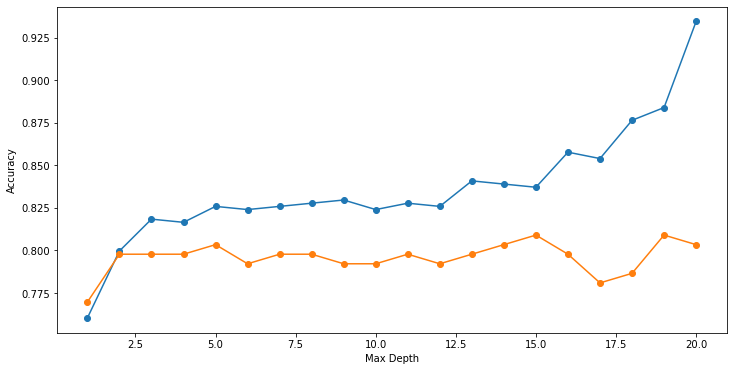

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

### Final question:

After making a few models, which one has the best performance (or closest metrics) on both train and validate?**a model with a max depth of 2 and minimum sample leaf of 19 produced the closest results with a 0.1% drop-off from the train set to the validate set.**

## kNN
### exercise 1:
Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [120]:
df = acquire.get_titanic_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


534

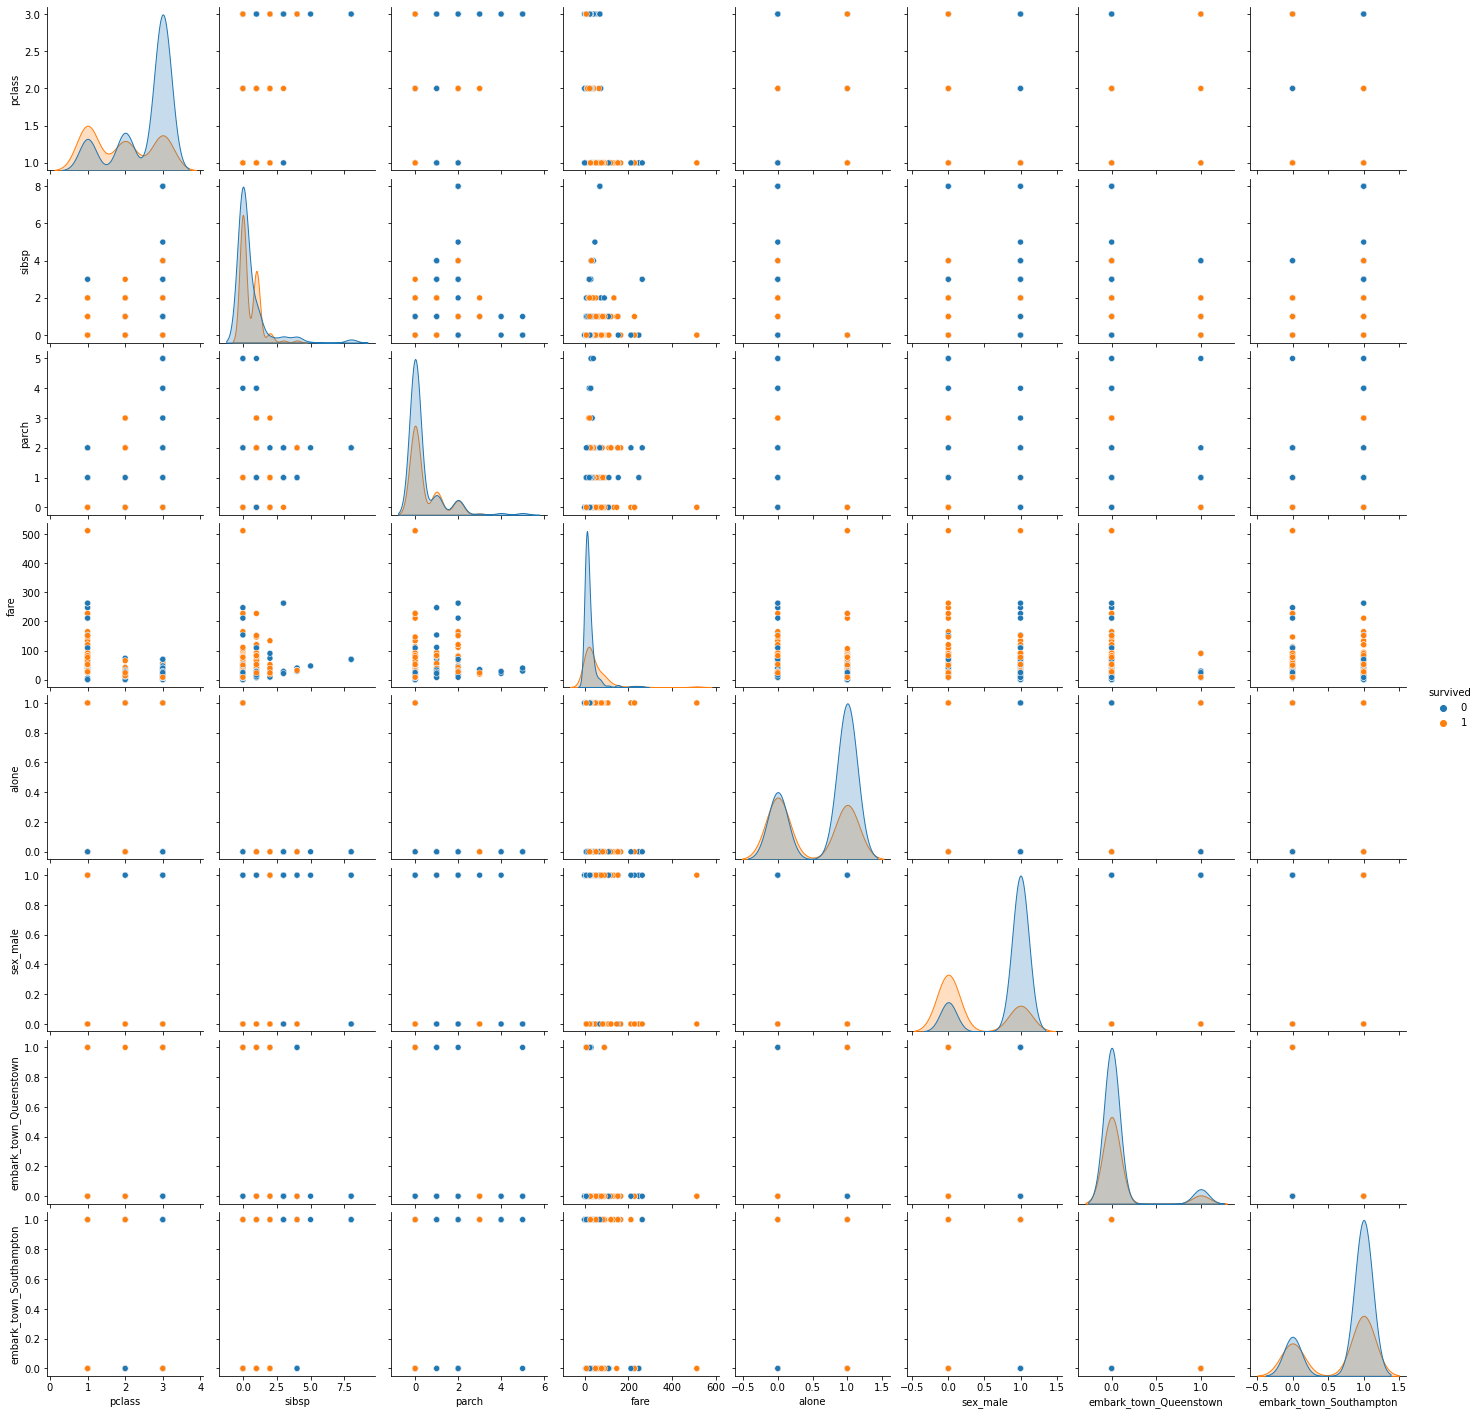

In [132]:
train,validate,test = prepare.prep_titanic(df)
sns.pairplot(data=train, hue='survived')
len(train)

In [133]:
X_train = train.drop(columns=['survived','sibsp','parch','fare','embark_town_Queenstown'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sibsp','parch','fare','embark_town_Queenstown'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sibsp','parch','fare','embark_town_Queenstown'])
y_test = test.survived


knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn5 = knn5.fit(x_train,y_train)
y_pred = knn5.predict(x_train)

### exercise 2:

Evaluate your results using the model score, confusion matrix, and classification report.

In [134]:
print(knn5.score(x_train,y_train))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.8258426966292135
[[290  39]
 [ 54 151]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       329
           1       0.79      0.74      0.76       205

    accuracy                           0.83       534
   macro avg       0.82      0.81      0.81       534
weighted avg       0.82      0.83      0.82       534



### exercise 3:
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [135]:
test_stats(y_train,y_pred)

Accuracy: 0.8258426966292135 

True Positive Rate/Sensitivity/Recall/Power: 0.7365853658536585 

False Positive Rate/False Alarm Ratio/Fall-out: 0.11854103343465046 

True Negative Rate/Specificity/Selectivity: 0.8814589665653495 

False Negative Rate/Miss Rate: 0.2634146341463415 

Precision/PPV: 0.7947368421052632 

F1 Score: 0.7645569620253164 

Support (0): 329 

Support (1): 205


### exercise 4:

Run through steps 2-4 setting k to 10

In [140]:
knn10 = KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn10 = knn10.fit(x_train,y_train)
y_pred = knn10.predict(x_train)
print(knn10.score(x_train,y_train))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
test_stats(y_train,y_pred)

0.7846441947565543
[[281  48]
 [ 67 138]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       329
           1       0.74      0.67      0.71       205

    accuracy                           0.78       534
   macro avg       0.77      0.76      0.77       534
weighted avg       0.78      0.78      0.78       534

Accuracy: 0.7846441947565543 

True Positive Rate/Sensitivity/Recall/Power: 0.6731707317073171 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1458966565349544 

True Negative Rate/Specificity/Selectivity: 0.8541033434650456 

False Negative Rate/Miss Rate: 0.32682926829268294 

Precision/PPV: 0.7419354838709677 

F1 Score: 0.7058823529411766 

Support (0): 329 

Support (1): 205


### exercise 5:

Run through setps 2-4 setting k to 20


In [141]:
knn20 = KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn20 = knn20.fit(x_train,y_train)
y_pred = knn20.predict(x_train)
print(knn20.score(x_train,y_train))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
test_stats(y_train,y_pred)

0.7846441947565543
[[281  48]
 [ 67 138]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       329
           1       0.74      0.67      0.71       205

    accuracy                           0.78       534
   macro avg       0.77      0.76      0.77       534
weighted avg       0.78      0.78      0.78       534

Accuracy: 0.7846441947565543 

True Positive Rate/Sensitivity/Recall/Power: 0.6731707317073171 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1458966565349544 

True Negative Rate/Specificity/Selectivity: 0.8541033434650456 

False Negative Rate/Miss Rate: 0.32682926829268294 

Precision/PPV: 0.7419354838709677 

F1 Score: 0.7058823529411766 

Support (0): 329 

Support (1): 205


In [142]:
performance=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    model = model.fit(x_train,y_train)
    in_sample_accuracy = model.score(x_train, y_train)
    out_of_sample_accuracy = model.score(x_validate, y_validate)
    output = {
        "K_nearest_neighbors": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    performance.append(output)
df = pd.DataFrame(performance)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,K_nearest_neighbors,train_accuracy,validate_accuracy,difference
0,1,0.846442,0.702247,0.144195
1,2,0.827715,0.702247,0.125468
2,3,0.859551,0.764045,0.095506
3,4,0.820225,0.735955,0.084270
4,5,0.825843,0.730337,0.095506
5,6,0.818352,0.713483,0.104869
6,7,0.807116,0.724719,0.082397
7,8,0.801498,0.713483,0.088015
8,9,0.797753,0.696629,0.101124
9,10,0.784644,0.719101,0.065543


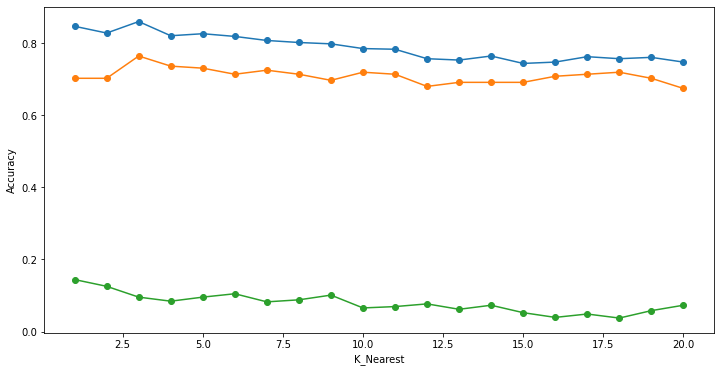

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(df.K_nearest_neighbors, df.train_accuracy, marker = 'o')
plt.plot(df.K_nearest_neighbors, df.validate_accuracy, marker = 'o')
plt.plot(df.K_nearest_neighbors, df.difference, marker = 'o')
plt.xlabel('K_Nearest')
plt.ylabel('Accuracy')
plt.show()

### exercise 6:

What are the differences in the evaluation metrics?**knn10 goes by the 10 nearest neighbors amd knn20 goes off the nearest 20** 

Which performs better on your in-sample data?**10 performed better than 20 on in sample data** 

Why?**because in most cases it is more likely to have the 10 nearest neighbors all belong to the same group. the higher the number of nearest neighbors the more likely the distribution resembles the overall distribution of the dataset**

### exercise 7:

Which model performs best on our out-of-sample data from validate?**knn10 performed the best on the out of sample data, and had the least amount of difference**

## Logisitic regression

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.


### exercise 1:
Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [31]:
df = acquire.get_titanic_data()
train,validate,test = prepare.prep_titanic(df)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 9 to 780
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 534 non-null    int64  
 1   pclass                   534 non-null    int64  
 2   age                      534 non-null    float64
 3   sibsp                    534 non-null    int64  
 4   parch                    534 non-null    int64  
 5   fare                     534 non-null    float64
 6   alone                    534 non-null    int64  
 7   sex_male                 534 non-null    uint8  
 8   embark_town_Queenstown   534 non-null    uint8  
 9   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 34.9 KB


In [45]:
x_train= train[['age','fare','pclass']]
y_train= train.survived

x_validate= validate[['age','fare','pclass']]
y_validate= validate.survived

x_test= test[['age','fare','pclass']]
y_test= test.survived

logit = LogisticRegression(C=2, random_state=123, solver='lbfgs')
logit = logit.fit(x_train,y_train)

In [46]:
y_pred = logit.predict(x_train)
print(logit.score(x_train,y_train))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.7059925093632958
[[288  41]
 [116  89]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       329
           1       0.68      0.43      0.53       205

    accuracy                           0.71       534
   macro avg       0.70      0.65      0.66       534
weighted avg       0.70      0.71      0.69       534



Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [47]:
x_train= train[['age','fare','pclass','sex_male']]
y_train= train.survived

x_validate= validate[['age','fare','pclass','sex_male']]
y_validate= validate.survived

x_test= test[['age','fare','pclass','sex_male']]
y_test= test.survived

logit = LogisticRegression(C=2, random_state=123, solver='lbfgs')
logit = logit.fit(x_train,y_train)

In [48]:
y_pred = logit.predict(x_train)
print(logit.score(x_train,y_train))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.7621722846441947
[[268  61]
 [ 66 139]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       329
           1       0.69      0.68      0.69       205

    accuracy                           0.76       534
   macro avg       0.75      0.75      0.75       534
weighted avg       0.76      0.76      0.76       534



Try out other combinations of features and models.

Use you best 3 models to predict and evaluate on your validate sample.

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?